(256, 256)
(256, 256)


/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:110: RuntimeWarning: divide by zero encountered in log


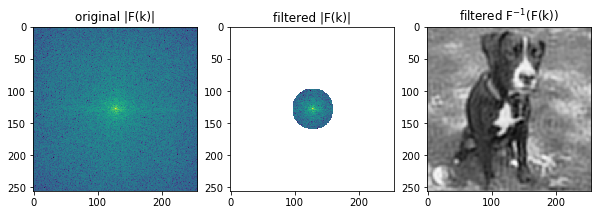

In [2]:
# two dimensional FFT example

# following http://matlabgeeks.com/tips-tutorials/how-to-do-a-2-d-fourier-transform-in-matlab/

import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

# get the figure
f = plt.imread("luna_bw.png")

# two dimension FFT -- F is complex
F = np.fft.fft2(f)

print(f.shape)
print(F.shape)

# find the mag and phase -- shift to put 0 wavenumber at the center
F_mag = np.abs(np.fft.fftshift(F))
F_phase = np.angle(np.fft.fftshift(F))


plt.rc("font", size=10)

plt.subplot(131)
plt.imshow(f, cmap=matplotlib.cm.Greys_r)
plt.title("original image")

plt.subplot(132)
plt.imshow(np.log(F_mag))
plt.title("|F(k)|")

plt.subplot(133)
plt.imshow(F_phase)
plt.title("phase of F(k)")

f = plt.gcf()
f.set_size_inches(10.0,6.0)

plt.savefig("fft2d.png", bbox_inches="tight")

#-------------------------------------------------------------------------------
# scramble phase

plt.clf()

Fnew_phase = 2.0*math.pi*np.random.rand(F_phase.shape[0], F_phase.shape[1])

# back to the complex representation
Fnew = F_mag*np.exp(1j*Fnew_phase)

fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))

plt.imshow(np.real(fnew), cmap=matplotlib.cm.Greys_r)
plt.title(r"F$^{-1}$(F(k)) with scrampled phases")
plt.savefig("fft2d_phasescamble.png", bbox_inches="tight")


#-------------------------------------------------------------------------------
# scramble amplitude

plt.clf()

Fnew_mag = np.max(F_mag)*np.random.rand(F_mag.shape[0], F_mag.shape[1])

# back to the complex representation
Fnew = Fnew_mag*np.exp(1j*F_phase)

fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))

plt.imshow(np.real(fnew), cmap=matplotlib.cm.Greys_r)
plt.title(r"F$^{-1}$(F(k)) with scrampled amplitudes")
plt.savefig("fft2d_magscamble.png", bbox_inches="tight")


#-------------------------------------------------------------------------------
# filter out high frequencies

plt.clf()

# http://glowingpython.blogspot.com/2011/08/fourier-transforms-and-image-filtering.html

F_orig = np.fft.fftshift(F)

P = np.zeros(F.shape, dtype=np.complex128)

frac = 0.25
rad = frac*int(min(F.shape)/2)


ic = F.shape[0]/2
jc = F.shape[1]/2

for i in range(F.shape[0]):
    for j in range(F.shape[1]):

        if math.sqrt( (i-ic)**2 + (j-jc)**2) < rad:
            P[i,j] = F_orig[i,j]


f_filtered = np.real(np.fft.ifft2(np.fft.ifftshift(P)))

plt.subplot(131)
plt.imshow(np.log(np.abs(F_orig)))
plt.title("original |F(k)|")

plt.subplot(132)
plt.imshow(np.log(np.abs(P)))
plt.title("filtered |F(k)|")

plt.subplot(133)
plt.imshow(f_filtered, cmap=matplotlib.cm.Greys_r)
plt.title(r"filtered F$^{-1}$(F(k))")

f = plt.gcf()
f.set_size_inches(10.0,6.0)

plt.savefig("fft2d_filtered.png", bbox_inches="tight")